In [13]:
import os 
import tarfile
import urllib

'''
In a typical environment, the data would be available in the relational database (or some kind of data store).
We are testing out the dataset sample from the purchase history from the company.
'''
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Sunnyryu/DaebakStudy/master/KrSuma/"
DATASET_PATH = os.path.join("Dataset", "Shopify_Orders_Sample_Jaesun" )
DATASET_URL = DOWNLOAD_ROOT + "Dataset/Shopify_Orders_Sample_Jaesun.tgz"

# function to fetch the dataset sample from github
def fetch_data(data_url = DATASET_URL, data_path = DATASET_PATH):
    os.makedirs(data_path, exist_ok=True)
    tgz_path = os.path.join(data_path, "Shopify_Orders_Sample_Jaesun.tgz")
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path=data_path)
    data_tgz.close()
    
import pandas as pd

# function to load the data
def load_purchase_data(data_path=DATASET_PATH):
    csv_path = os.path.join(data_path, "Shopify_Orders_Sample_Jaesun.csv")
    return pd.read_csv(csv_path)


In [14]:
# fetching the data, loading the data, and taking a quick look at the data structure.
fetch_data()
purchase = load_purchase_data()
purchase.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number
0,#DBB100411089KR,davidnguyen564@yahoo.com,paid,2020-03-02 21:35:31 -0500,unfulfilled,NaN,yes,USD,44.99,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#DBB100411090KR,sosa.stephany0@gmail.com,paid,2020-03-02 22:49:43 -0500,unfulfilled,NaN,yes,USD,52.98,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#DBB100411090KR,sosa.stephany0@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#DBB100411091KR,hottdamnn@gmail.com,paid,2020-03-02 23:47:02 -0500,unfulfilled,NaN,yes,USD,110.95,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#DBB100411091KR,hottdamnn@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# viewing the purchase info.
purchase.info()

'''
102 entries, 72 columns

Notice that most attribute has only partial nonnull values - meaning that many are missing this feature.
we need to take care of the empty featues.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         106 non-null    object 
 1   Email                        106 non-null    object 
 2   Financial Status             50 non-null     object 
 3   Paid at                      50 non-null     object 
 4   Fulfillment Status           50 non-null     object 
 5   Fulfilled at                 0 non-null      float64
 6   Accepts Marketing            50 non-null     object 
 7   Currency                     50 non-null     object 
 8   Subtotal                     50 non-null     float64
 9   Shipping                     50 non-null     float64
 10  Taxes                        50 non-null     float64
 11  Total                        50 non-null     float64
 12  Discount Code                9 non-null      object 
 13  Discount Amount     

'\n102 entries, 72 columns\n\nNotice that most attribute has only partial nonnull values - meaning that many are missing this feature.\nwe need to take care of the empty featues.\n'

In [16]:
# viewing the currency's categories.
print(purchase["Lineitem name"].value_counts())

'''
for example, we see that there is only USD category of 50. Meaning that the empty category probably is in Won.
'''

Seasonal (ships once every season, auto-renews every season)                14
[Add-On] Bring green Fresh Bowl Pack 8pcs                                    6
MTPR X BTS Lens (DNA.Ver_Color) - DESTINY  LIGHT BLUE                        5
MTPR X BTS Lens (DNA.Ver_Color) - DESTINY BROWN                              4
The Saem Healing Tea Garden Cleansing Water Green Tea                        4
[Add-On] Nature Republic Pro Touch Chemistry Multi Palette                   4
[Add-On] lilybyred Romantic Mousse Tint Mini Kit Black                       3
[Daily Deal] Tom's Cool Color Eye Shadow Set                                 3
Nature Republic Exo Edition Water Tint - BAEKHYUN                            3
[Daily Deal] Jerry's Warm Color Eye Shadow Set                               3
[Add-On] Kakao Friends Tin Memo-Lovely Ryan                                  2
MTPR Lens Case IDOL_Jung Kook                                                2
MTPR Lens Case IDOL_ Jin                            

'\nfor example, we see that there is only USD category of 50. Meaning that the empty category probably is in Won.\n'

In [17]:
# view the summary of the numerical attributes of the dataset.
print(purchase.describe())

'''
out of 102 entries, only 50 were 'completed' (money being paid).
for example, most purchases had an average of 46.53 value
'''

       Fulfilled at    Subtotal   Shipping      Taxes       Total  \
count           0.0   50.000000  50.000000  50.000000   50.000000   
mean            NaN   46.533000   0.400000   0.164400   47.097400   
std             NaN   24.866721   2.828427   0.753823   25.049043   
min             NaN   13.990000   0.000000   0.000000   13.990000   
25%             NaN   32.972500   0.000000   0.000000   33.230000   
50%             NaN   46.970000   0.000000   0.000000   46.970000   
75%             NaN   49.990000   0.000000   0.000000   49.990000   
max             NaN  123.930000  20.000000   4.740000  123.930000   

       Discount Amount  Lineitem quantity  Lineitem price  \
count        50.000000         106.000000      106.000000   
mean          1.065400           1.018868       22.225849   
std           2.627059           0.136705       12.747027   
min           0.000000           1.000000        4.990000   
25%           0.000000           1.000000       13.990000   
50%         

"\nout of 102 entries, only 50 were 'completed' (money being paid).\nfor example, most purchases had an average of 46.53 value\n"

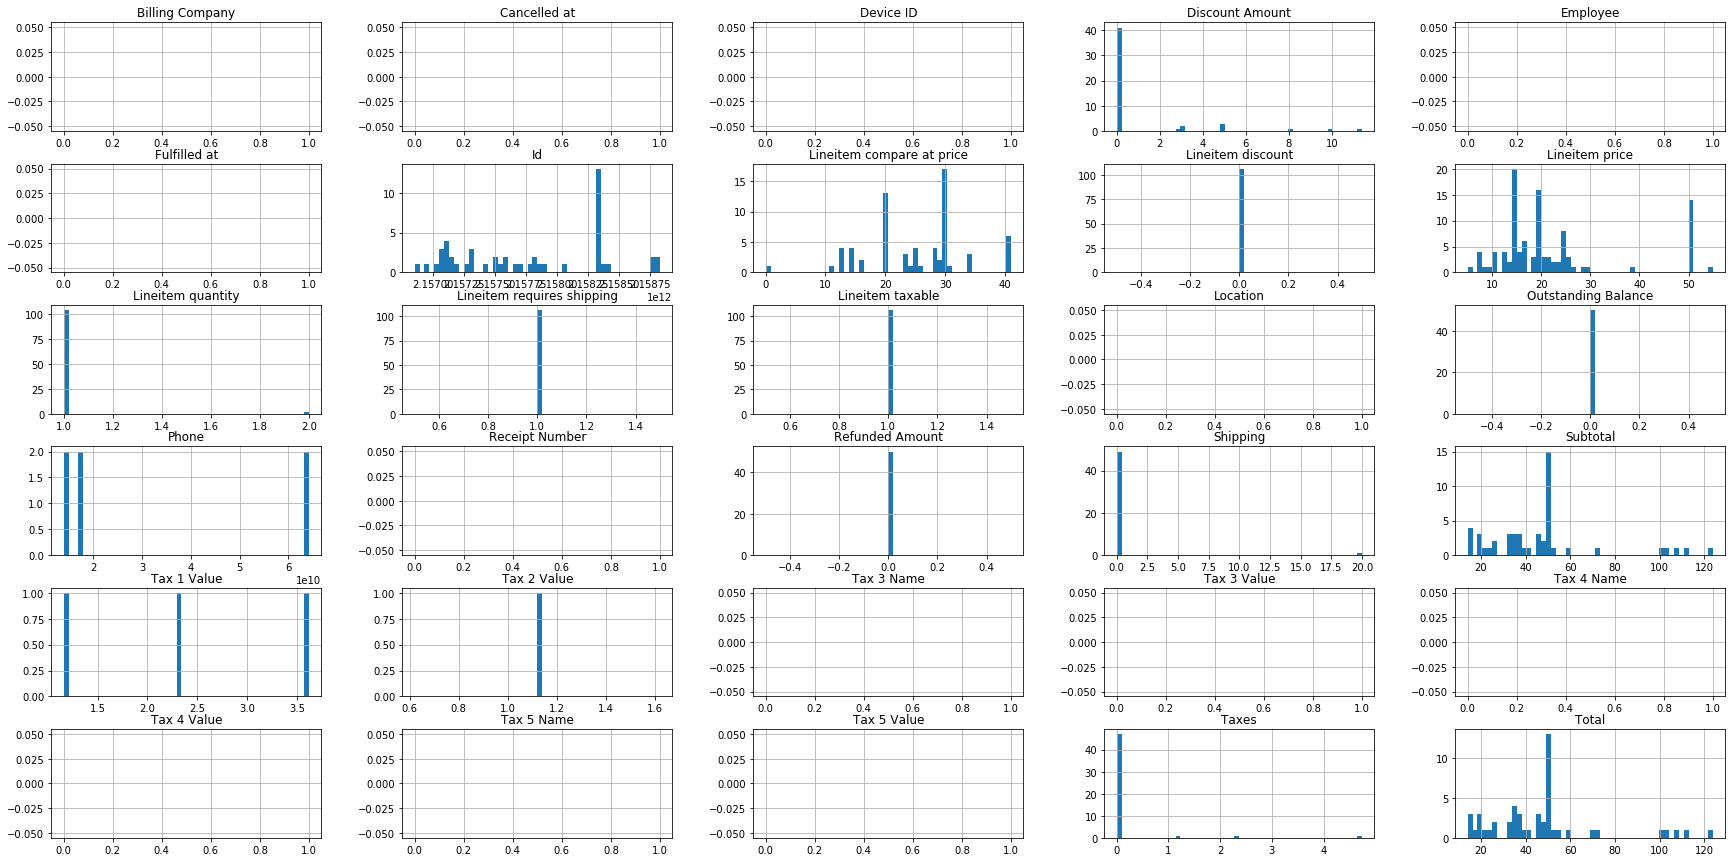

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
purchase.hist(bins=50, figsize=(30,15))
plt.show()


49.99     14
19.99      3
15.99      2
37.97      2
40.96      1
123.93     1
110.95     1
102.55     1
106.93     1
59.98      1
34.97      1
49.97      1
71.98      1
48.96      1
39.98      1
52.98      1
31.98      1
44.98      1
33.98      1
100.95     1
25.99      1
34.98      1
44.99      1
32.98      1
26.09      1
32.97      1
14.99      1
23.98      1
20.99      1
47.97      1
13.99      1
36.98      1
45.97      1
Name: Subtotal, dtype: int64
13.99
123.93


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

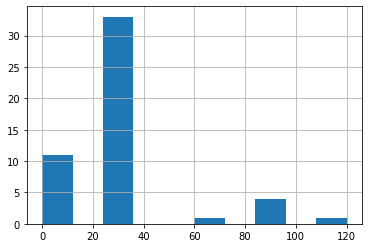

In [36]:
# creating a test set 
import numpy as np

# creating a random seed so that the test set is identical when recreated
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(purchase, 0.2)
len(train_set)
len(test_set)

'''
the dataset set breaks when the dataset is updated!
'''

#same method as above, using scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(purchase, test_size=0.2, random_state=42)

'''
for large dataset relative to its number of attributes

if the dataset is not as large as it should be, there is a high risk for introducing a sample bias.
we need Stratified Sampling in order to select random samples such that it best represents the whole population.
divide the population into homogeneous subgroups (stratas)
'''
print(purchase["Subtotal"].value_counts())
print(purchase["Subtotal"].min())
print(purchase["Subtotal"].max())

# min value is 13.99, max value is 123.93, so we will divide the subtotal category in 5 bins, in increments of 30.
purchase["subtotal_cat"] = pd.cut(purchase["Subtotal"], bins = [0.,30.0,60.0,90.0,120.0,np.inf], labels = [0,30,60,90,120])
purchase["subtotal_cat"].hist()

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
# for train_index, test_index in split.split(purchase, purchase["subtotal_cat"]):
#     strat_train_set = purchase.loc[train_index]
#     strat_test_set = purchase.loc[test_index]
# 
# strat_test_set["subtotal_cat"].value.counts() / len(strat_test_set)